# Datos descargados de: https://www.pmel.noaa.gov/tao/drupal/disdel/



---
# AUTOR : Michael De La Cruz La Rosa
### 20180176@lamolina.edu.pe
### Michael.dlc.lr@gmail.com
# ALTURA DINÁMICA DE LA BOYA UBICADA EN 0°N - 170°W

---

In [38]:
# Conectando google drive con colab:
#-------------------------------------
from google.colab import drive
drive.mount('/content/drive/')
#-------------------------------------
import os
path = '/content/drive/MyDrive/Colab Notebooks/OCEANOGRAFIA/OCEANOGRAFIA/' # Ruta del directorio de trabajo
os.chdir(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [39]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# Abrimos el archivo .cdf
alt_din = xr.open_dataset(path + 'dyn0n170w_dy.cdf',drop_variables=['QD_5013'])
alt_din['time'] = pd.date_range(alt_din.time[0].values, alt_din.time[-1].values, freq = 'D')
alt_din

<xarray.Dataset>
Dimensions:  (time: 11638, depth: 1, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 1992-03-08T12:00:00 ... 2024-01-17T12:00:00
  * depth    (depth) float32 0.0
  * lat      (lat) float32 0.0
  * lon      (lon) float32 190.0
Data variables:
    DYN_13   (time, depth, lat, lon) float32 ...
Attributes:
    platform_code:                0n170w
    site_code:                    0n170w
    wmo_platform_code:            51010
    array:                        TAO/TRITON
    Request_for_acknowledgement:  If you use these data in publications or pr...
    Data_Source:                  Global Tropical Moored Buoy Array Project O...
    File_info:                    Contact: Dai.C.McClurg@noaa.gov
    missing_value:                1e+35
    _FillValue:                   1e+35
    CREATION_DATE:                06:19 19-JAN-2024

In [41]:
# Calculamos la climatología diario (promedio histórico) de 30 años consecutivos
Inicio = '1991-01-01'
Fin = '2020-12-31'
alt_din_clim = alt_din.sel(time=slice(Inicio, Fin)).groupby('time.dayofyear').mean(dim='time')

# Transformamos a dataframe y nos quedamos con una serie de tiempo (eliminamos 'depth','lat','lon')
alt_din_df_clim = alt_din_clim.to_dataframe().reset_index()\
.drop(['depth','lat','lon'], axis=1).set_index('dayofyear').reset_index().drop('dayofyear', axis=1)

# Duplicamos y renombramos la columna
alt_din_df_clim = pd.concat([alt_din_df_clim] * 2, ignore_index=True).rename(columns = {'DYN_13' : 'DYN_13_Clim'})
alt_din_df_clim

,DYN_13_Clim
0,126.947510
1,128.177948
2,128.163864
3,128.182404
4,128.610596
...,...
727,127.161102
728,126.789230
729,126.888054
730,126.733765


In [42]:
# round(alt_din_df_clim.describe().loc[['max', 'min', 'mean', 'std']],2)

In [43]:
# Este paso conviene para quedarnos con los índices de todos los años
alt_din_df = alt_din.to_dataframe().reset_index().drop(['depth','lat','lon'], axis=1).set_index('time')
alt_din_df

,DYN_13
time,
1992-03-08 12:00:00,120.289352
1992-03-09 12:00:00,119.745766
1992-03-10 12:00:00,121.792458
1992-03-11 12:00:00,121.464989
1992-03-12 12:00:00,121.443291
...,...
2024-01-13 12:00:00,127.938377
2024-01-14 12:00:00,129.810791
2024-01-15 12:00:00,127.993645


In [44]:
YearsUnidos_df = pd.DataFrame()
ListaYears = [1997, 1998, 2016, 2017, 2022, 2023] # Los años a analizar

for i in range(0, len(ListaYears), 2):
  Col1 = str(ListaYears[i])
  Col2 = str(ListaYears[i+1])
  Cols = alt_din_df.loc[Col1:Col2].reset_index().drop(['time'],axis=1)
  YearsUnidos_df = pd.concat([YearsUnidos_df, Cols], axis = 1)\
  .rename(columns = {'DYN_13' : f'DYN_13_{Col1}_{Col2}'})
YearsUnidos_df

,DYN_13_1997_1998,DYN_13_2016_2017,DYN_13_2022_2023
0,132.148178,139.582840,131.048065
1,132.872696,138.127945,131.928497
2,132.404068,135.774948,132.843262
3,132.510101,135.836411,134.910370
4,139.628281,140.550903,132.099976
...,...,...,...
726,118.682465,130.905594,136.871597
727,118.132973,131.671112,137.420013
728,116.365875,129.279694,137.492020
729,113.741501,129.871246,135.961288


In [45]:
# Ahora vamos unir los dataframe : alt_din_df_clim y YearsUnidos_df
df = pd.concat([alt_din_df_clim, YearsUnidos_df], axis = 1)
df

,DYN_13_Clim,DYN_13_1997_1998,DYN_13_2016_2017,DYN_13_2022_2023
0,126.947510,132.148178,139.582840,131.048065
1,128.177948,132.872696,138.127945,131.928497
2,128.163864,132.404068,135.774948,132.843262
3,128.182404,132.510101,135.836411,134.910370
4,128.610596,139.628281,140.550903,132.099976
...,...,...,...,...
727,127.161102,118.132973,131.671112,137.420013
728,126.789230,116.365875,129.279694,137.492020
729,126.888054,113.741501,129.871246,135.961288
730,126.733765,NaN,128.899689,NaN


In [46]:
# round(df.describe().loc[['max', 'min', 'mean', 'std']],2)

In [47]:
import matplotlib.dates as mdates
def AltDin_vs_year(data,year):
  fig, ax = plt.subplots(figsize=(7,3))
  barras = ax.bar(data.index,data.iloc[:,0], color ='cornflowerblue', label = 'Prom. Histórico',zorder = 10,width = 1, alpha = 0.85)
  Lineas = ax.plot(data.index,data[data.columns[i]],color ='tomato', alpha = 1, label = f'Año: {year}',zorder = 10,linewidth=0.8)
  # =============================================================================
  # Título y Etiquetas de los Ejes
  ax.set_title(f"Altura Dinámica: Histórico (1991-2020) vs {year}\nBoya: {alt_din.attrs['site_code']}", fontsize=12, color = 'black')
  ax.set_ylabel('Altura Dinámica [cm]', fontsize=10)
  ax.tick_params(colors='black')
  # =============================================================================
  # Del Eje Y
  min_value = int((data.min().min() - 10) / 10) * 10
  max_value = int((data.max().max() + 10) / 10) * 10

  ax.set_ylim(min_value, max_value)
  ax.set_yticks(range(int(min_value), int(max_value) + 10, 10))
  ax.yaxis.label.set_color('black')
  # =============================================================================
  # Del Eje X
  ax.xaxis.label.set_color('black')
  ax.xaxis.set_major_locator(mdates.MonthLocator())
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
  plt.xticks(rotation=45)
  # =============================================================================
  # Grillas y leyenda
  ax.grid(linewidth=1, color='gainsboro', linestyle='--',alpha=0.5)
  plt.axvline(x=365,color ='crimson', linestyle='--',linewidth=1,zorder = 10)
  ax.legend(loc='best', fontsize=10, labelcolor='black')

  plt.text(0, -0.25, 'Fuente de datos: NOAA [TAO/TRITON]', fontsize=10, ha='left',
        va='center', color='black', transform=plt.gca().transAxes)
  # =============================================================================
  # Guardar
  # fig.savefig(path +'Resultados_tesina/' + f"Alt_Dyn_{alt_din.attrs['site_code']}_{year}.jpg",
  #                 transparent = False, pad_inches = 0.1, dpi = 700, bbox_inches = 'tight')
  # plt.tight_layout()
  plt.show()
  plt.close()

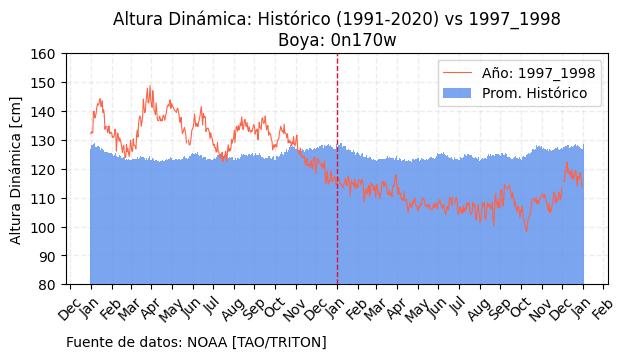

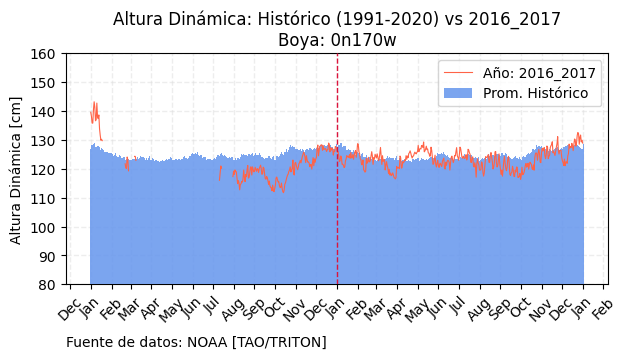

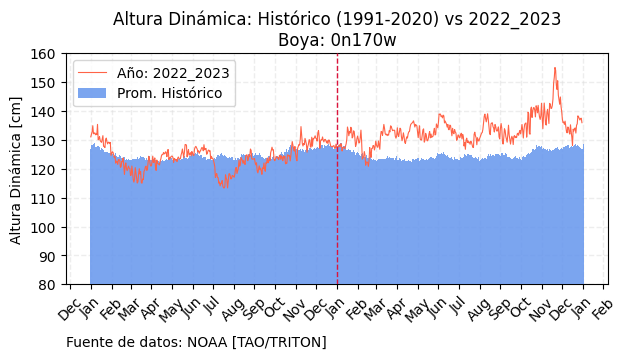

In [48]:
for i in range(1,len(df.columns)):
  AltDin_vs_year(df,df.columns[i].split("DYN_13_")[1])

 # ANOMALÍAS:

In [49]:
# Calculamos las anomalías diarias
alt_din_anom = alt_din.groupby('time.dayofyear') - alt_din_clim
alt_din_anom

<xarray.Dataset>
Dimensions:    (time: 11638, depth: 1, lat: 1, lon: 1)
Coordinates:
  * time       (time) datetime64[ns] 1992-03-08T12:00:00 ... 2024-01-17T12:00:00
  * depth      (depth) float32 0.0
  * lat        (lat) float32 0.0
  * lon        (lon) float32 190.0
    dayofyear  (time) int64 68 69 70 71 72 73 74 75 ... 10 11 12 13 14 15 16 17
Data variables:
    DYN_13     (time, depth, lat, lon) float32 -2.945 -3.782 ... -0.5156 -3.246

In [50]:
# Transformamos a dataframe y nos quedamos con una serie de tiempo (eliminamos 'depth','lat','lon')
alt_din_anom_df = alt_din_anom.to_dataframe().reset_index().drop(['depth','lat','lon','dayofyear'], axis=1).set_index('time')
alt_din_anom_df

,DYN_13
time,
1992-03-08 12:00:00,-2.945396
1992-03-09 12:00:00,-3.782181
1992-03-10 12:00:00,-2.127579
1992-03-11 12:00:00,-2.028160
1992-03-12 12:00:00,-1.800423
...,...
2024-01-13 12:00:00,0.216515
2024-01-14 12:00:00,2.385147
2024-01-15 12:00:00,1.584686


In [51]:
Lista_Anom = []
for i in range(0, len(ListaYears), 2):
  Col1 = str(ListaYears[i])
  Col2 = str(ListaYears[i+1])
  Cols = alt_din_anom_df.loc[Col1:Col2].reset_index().drop(['time'],axis=1)
  Anom = Cols.rename(columns = {'DYN_13' : f'DYN_13_Anom_{Col1}_{Col2}'})
  Lista_Anom.append(Anom)
df_Anom = pd.concat(Lista_Anom, axis=1)
df_Anom

,DYN_13_Anom_1997_1998,DYN_13_Anom_2016_2017,DYN_13_Anom_2022_2023
0,5.200668,12.635330,4.100555
1,4.694748,9.949997,3.750549
2,4.240204,7.611084,4.679398
3,4.327698,7.654007,6.727966
4,11.017685,11.940308,3.489380
...,...,...,...
726,-8.478638,3.931862,9.710495
727,-8.656258,4.510010,10.630783
728,-10.522179,2.490463,10.603966
729,-12.992264,2.983192,9.227524


In [52]:
# round(df_Anom.describe().loc[['max', 'min', 'mean', 'std']],2)

In [53]:
def Anom_year(data,year):
  fig, ax = plt.subplots(figsize=(9,3))
  colores = np.where(data[data.columns[i]]>0, 'tomato', 'cornflowerblue')
  barras = ax.bar(data.index,data[data.columns[i]],color =colores, alpha = 1, label = f'Año: {year}',zorder = 10, width = 1)

  ax.set_ylabel('Anomalías [cm]', fontsize=10)
  # #-----------------------------------------------------------------------------------------
  ax.set_title(f"Anomalías de Altura Dinámica, Año: {year}\nBoya: {alt_din.attrs['site_code']}", fontsize=12, color = 'black')

  ax.xaxis.label.set_color('black')
  ax.yaxis.label.set_color('black')
  ax.tick_params(colors='black')
  ax.grid(linewidth=1, color='silver', linestyle='--',alpha=0.5)

  min_value = int((data.min().min() - 10) / 10) * 10
  max_value = int((data.max().max() + 10) / 10) * 10

  ax.set_ylim(min_value, max_value)
  ax.set_yticks(range(int(min_value), int(max_value) + 10, 10))

  ax.xaxis.set_major_locator(mdates.MonthLocator())
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
  plt.axvline(x=365,color ='crimson', linestyle='--',linewidth=1,zorder = 10)
  plt.xticks(rotation=45)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)

  plt.text(0, -0.25, 'Fuente de datos: NOAA [TAO/TRITON]', fontsize=10, ha='left',
        va='center', color='black', transform=plt.gca().transAxes)
  # #-----------------------------------------------------------------------------------------
  # # ax.legend(loc='best', bbox_to_anchor=(1.35, 0.11), fontsize=11, labelcolor='black')
  # fig.savefig(path +'Resultados_tesina/' + f"AltDyn_Anom_{alt_din.attrs['site_code']}_{year}.jpg",
  #                 transparent = False, pad_inches = 0.1, dpi = 700, bbox_inches = 'tight')
  plt.show()
  plt.close()

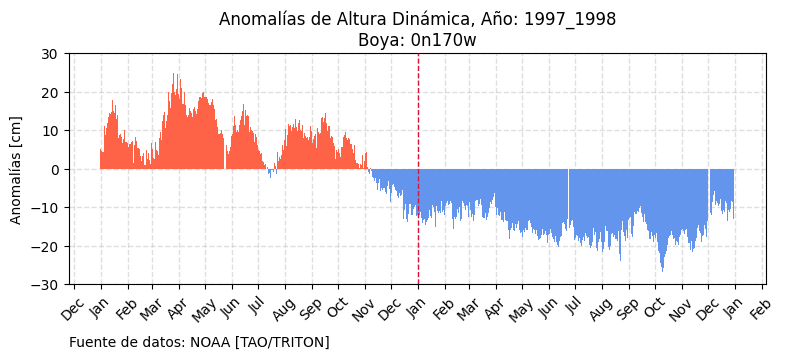

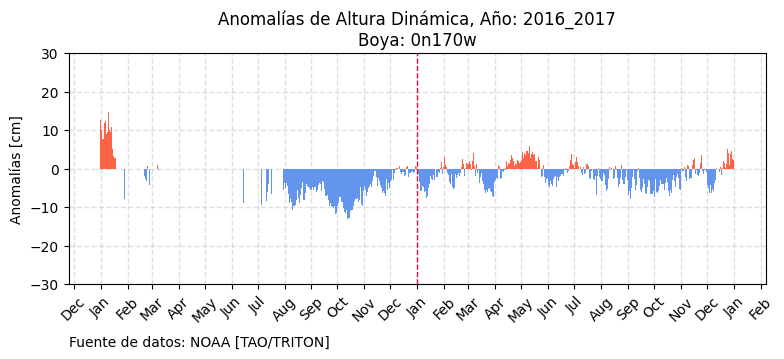

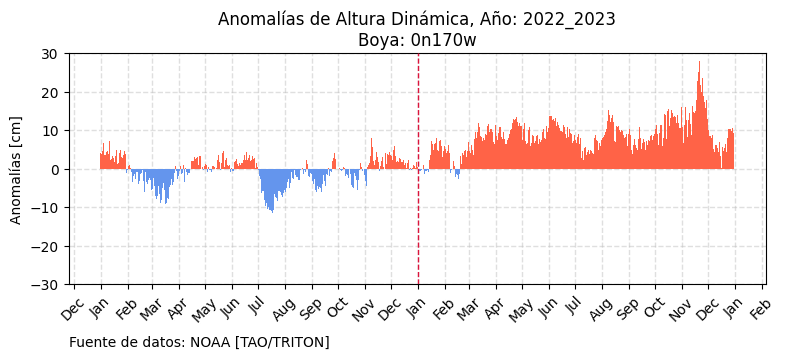

In [54]:
for i in range(0,len(df_Anom.columns)):
  Anom_year(df_Anom, df_Anom.columns[i].split("DYN_13_Anom_")[1])



---
# Los datos utilizados se encuentran en el siguiente link:
https://drive.google.com/drive/folders/1zo4Uq3XS9KKn_I2Ei1J_FiYu4QryQnNt



---